# Radio astronomy analysis

## Import libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import astropy
from astropy.io import fits
from astropy import units as u
from lmfit import Model
from lmfit.models import GaussianModel, LinearModel
import pandas as pd
import os
from mw_plot import MWPlot

# Solar coordinates

In [2]:
def const(x, c):
    return c
backround = Model(const)
peak = GaussianModel()
sun_model = peak + backround

## Right ascension

['Offm1.fits', 'Offm10.fits', 'Offm12.fits', 'Offm14.fits', 'Offm2.fits', 'Offm3.fits', 'Offm4.fits', 'Offm5.fits', 'Offm6.fits', 'Offm8.fits', 'Offp0.fits', 'Offp1.fits', 'Offp10.fits', 'Offp12.fits', 'Offp14.fits', 'Offp2.fits', 'Offp3.fits', 'Offp4.fits', 'Offp5.fits', 'Offp6.fits', 'Offp8.fits']


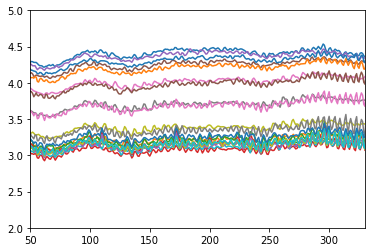

In [3]:
path = '/Users/william/Desktop/Labwork/Radio_astronomy/Group2SS21/Sun-RA'
files = os.listdir(path)

for file in files:
    if file[-4:] != 'fits':
        files.remove(file)

files = sorted(files)
print(files)

for file in files:
    hdul = fits.open(path+'/'+file)
    #print(hdul[0].data.shape)

    plt.plot(hdul[0].data[0][0])
    plt.ylim(2,5)
    plt.xlim(50,330)
    #plt.show()
    hdul.close()

[3.0751455 3.1524737 3.2137923 3.1113665 3.3842108 3.710397  4.0287004
 4.2769713 4.407567  4.4443445 4.336095  4.225756  3.9911277 3.6889634
 3.3423913 3.1515296 3.1640189 3.2578156 3.2260795 3.1629388 3.1413147]
[[Model]]
    (Model(gaussian) + Model(const))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 68
    # data points      = 21
    # variables        = 4
    chi-square         = 0.09918229
    reduced chi-square = 0.00583425
    Akaike info crit   = -104.461682
    Bayesian info crit = -100.283593
[[Variables]]
    amplitude:  9.79004616 +/- 0.50568638 (5.17%) (init = 1.2)
    center:    -1.10785120 +/- 0.10251274 (9.25%) (init = 0)
    sigma:      2.86937429 +/- 0.12895798 (4.49%) (init = 5)
    c:          3.13957832 +/- 0.02758211 (0.88%) (init = 3.2)
    fwhm:       6.75685996 +/- 0.30367283 (4.49%) == '2.3548200*sigma'
    height:     1.36115513 +/- 0.04705783 (3.46%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported cor

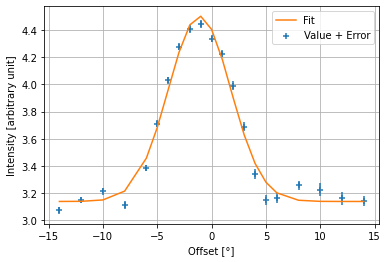

In [4]:
means = []
sds = []
offsets = []
for file in files:
    hdul = fits.open(path+'/'+file)
    data = hdul[0].data[0][0][150:250]
    mean = np.mean(data)
    sd = np.std(data)
    offset = float(file[4:-5])
    if file[3] == 'm':
        offset = - offset
    #print(offset)
    
    means.append(mean)
    sds.append(sd)
    offsets.append(offset)
    hdul.close()

offsets = np.array(offsets)
args = np.argsort(offsets)
offsets = np.sort(offsets)

means = np.array(means)
means = means[args]

sds = np.array(sds)
sds = sds[args]

print(means)

fit_result = sun_model.fit(means, x=offsets, amplitude=1.2, sigma=5, center=0, c=3.2)
print(fit_result.fit_report())
plt.scatter(offsets, means, marker='+', label= "Value + Error")
plt.errorbar(offsets, means, yerr=sds, linestyle='None')
plt.plot(offsets, fit_result.best_fit, label = "Fit")
#plt.title("Sun Intensity Distribution (fixed DEC)")
plt.ylabel("Intensity [arbitrary unit]")
plt.xlabel("Offset [°]")
plt.legend()
plt.grid()
plt.savefig("Sun_RA_gauss.pdf")
plt.show()

## Declination

['Offm1.fits', 'Offm10.fits', 'Offm12.fits', 'Offm14.fits', 'Offm2.fits', 'Offm3.fits', 'Offm4.fits', 'Offm5.fits', 'Offm6.fits', 'Offm8.fits', 'Offp0.fits', 'Offp1.fits', 'Offp10.fits', 'Offp12.fits', 'Offp14.fits', 'Offp2.fits', 'Offp3.fits', 'Offp4.fits', 'Offp5.fits', 'Offp6.fits', 'Offp8.fits']


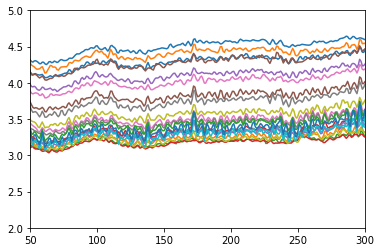

In [5]:
path = '/Users/william/Desktop/Labwork/Radio_astronomy/Group2SS21/Sun-dec'
files = os.listdir(path)

for file in files:
    if file[-4:] != 'fits':
        files.remove(file)

files = sorted(files)
print(files)

for file in files:
    hdul = fits.open(path+'/'+file)
    #print(hdul[0].data.shape)

    plt.plot(hdul[0].data[0][0])
    plt.ylim(2,5)
    plt.xlim(50,300)
    #plt.show()
    hdul.close()

[[Model]]
    (Model(gaussian) + Model(const))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 67
    # data points      = 21
    # variables        = 4
    chi-square         = 0.09614244
    reduced chi-square = 0.00565544
    Akaike info crit   = -105.115384
    Bayesian info crit = -100.937295
[[Variables]]
    amplitude:  7.99285202 +/- 0.43994497 (5.50%) (init = 1.2)
    center:     0.40160651 +/- 0.10303535 (25.66%) (init = 0)
    sigma:      2.56277462 +/- 0.12463317 (4.86%) (init = 5)
    c:          3.29016257 +/- 0.02586188 (0.79%) (init = 3.2)
    fwhm:       6.03487294 +/- 0.29348867 (4.86%) == '2.3548200*sigma'
    height:     1.24423222 +/- 0.04766762 (3.83%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, c)     = -0.772
    C(amplitude, sigma) =  0.734
    C(sigma, c)         = -0.547


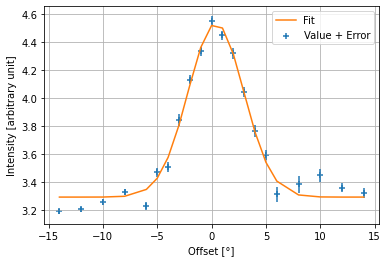

In [6]:
means = []
sds = []
offsets = []
for file in files:
    hdul = fits.open(path+'/'+file)
    data = hdul[0].data[0][0][150:250]
    mean = np.mean(data)
    sd = np.std(data)
    offset = float(file[4:-5])
    if file[3] == 'm':
        offset = - offset
    #print(offset)
    
    means.append(mean)
    sds.append(sd)
    offsets.append(offset)
    hdul.close()

offsets = np.array(offsets)
args = np.argsort(offsets)
offsets = np.sort(offsets)

means = np.array(means)
means = means[args]

sds = np.array(sds)
sds = sds[args]

fit_result = sun_model.fit(means, x=offsets, amplitude=1.2, sigma=5, center=0, c=3.2)
print(fit_result.fit_report())
plt.scatter(offsets, means, marker='+', label= "Value + Error")
plt.errorbar(offsets, means, yerr=sds, linestyle='None')
plt.plot(offsets, fit_result.best_fit, label = "Fit")
#plt.title("Sun Intensity Distribution (fixed RA)")
plt.ylabel("Intensity [arbitrary unit]")
plt.xlabel("Offset [°]")
plt.legend()
plt.grid()
plt.savefig("Sun_DEC_gauss.pdf")
plt.show()



# Galaxy rotation curve

In [7]:
path = '/Users/william/Desktop/Labwork/Radio_astronomy/Group2SS21/mw'
files = os.listdir(path)
files = sorted(files)
print(files[0])

l0.fits


(1, 1, 512)


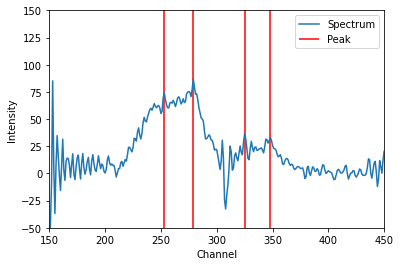

In [8]:
hdul = fits.open(path+'/'+files[0])
print(hdul[0].data.shape)
plt.plot(hdul[0].data[0][0], label="Spectrum")
plt.xlim(150,450)
plt.ylim(-50,150)
plt.vlines(253, -50,150, colors='red', label='Peak')
plt.vlines(279, -50,150, colors='red')
plt.vlines(325, -50,150, colors='red')
plt.vlines(348, -50,150, colors='red')
plt.ylabel("Intensity")
plt.xlabel("Channel")
plt.legend()
#plt.savefig("l0_spectrum.pdf")
plt.show()
hdul.close()

In [9]:
path_csv = '/Users/william/Desktop/Labwork/Radio_astronomy/Group2SS21/numbers/Sheet 1-Observed lines.csv'
all_lines = pd.read_csv(path_csv)
print(all_lines)

      l  V1    V2    V3    V4
0     0 -67 -47.0 -22.0   7.0
1     5 -89 -66.0 -40.0   9.0
2    10 -63 -27.0   3.0  15.0
3    15 -39 -27.0  29.0   NaN
4    20 -25  39.0   NaN   NaN
5    25 -36  18.0  54.0   NaN
6    30 -21  62.0   NaN   NaN
7    35 -18  -4.0  34.0  84.0
8    40 -38  -6.0 -36.0  75.0
9    45 -29  15.0  65.0   NaN
10   50  -2  51.0   NaN   NaN
11   55  -2  34.0   NaN   NaN
12   60  27  36.0   NaN   NaN
13   65 -38  16.0   NaN   NaN
14   70 -32 -18.0  27.0   NaN
15   75 -43   7.0  19.0   NaN
16   80 -17  -6.0  21.0  25.0
17   85  -6   8.0   NaN   NaN
18   90 -84   4.0   NaN   NaN
19   95  -2   NaN   NaN   NaN
20  100 -82 -20.0  -2.0   NaN
21  105  -2   NaN   NaN   NaN
22  110 -42 -31.0   8.0   NaN
23  115 -36 -26.0   NaN   NaN
24  120  -9  -3.0   NaN   NaN
25  125 -23   NaN   NaN   NaN
26  130 -26   NaN   NaN   NaN
27  137 -64 -23.0   NaN   NaN
28  144 -59 -35.0 -20.0   NaN
29  151 -50 -23.0   NaN   NaN
30  158 -42 -18.0   NaN   NaN
31  165 -50 -15.0   NaN   NaN
32  172 -2

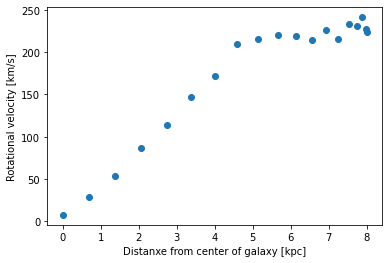

In [10]:
long = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
v = [7,9,15,29,39,54,62,84,75,65,51,34,36,16,27,19,25,8,4]


R0 = 8 #kpc
V0 = 220 #km/s
 
l_rad=[n*(5*(np.pi/180)) for n in range(19)] #turn l in radians
sin_l=np.sin(l_rad) # take sin
RT=R0 * sin_l 
VT= v + V0*sin_l

plt.scatter(RT,VT)
plt.xlabel("Distanxe from center of galaxy [kpc]")
plt.ylabel("Rotational velocity [km/s]")
plt.savefig("rot_curve.pdf")

# Galaxy map


# l-v map


In [11]:
lines_q1 =[]
lines_q23 =[]

l_q1 = np.array([0,0,0,0,5,5,5,5,10,10,10,10,15,15,15,20,20,25,25,25,30,30,35,35,35,35,40,40,40,40,45,45,45,50,50,55,55,60,60,65,65,70,70,70,75,75,75,80,80,80,80,85,85,90,90])
l_q23 = np.array([95,100,100,100,105,110,110,110,115,115,120,120,125,130,137,137,144,144,144,151,151,158,158,165,165,172,179,186,193,200,207,207])

for i in range(len(all_lines['l'])):
    if all_lines['l'][i] < 95:
        lines_q1.append(all_lines['V1'][i])
        lines_q1.append(all_lines['V2'][i])
        lines_q1.append(all_lines['V3'][i])
        lines_q1.append(all_lines['V4'][i])
    else:
        lines_q23.append(all_lines['V1'][i])
        lines_q23.append(all_lines['V2'][i])
        lines_q23.append(all_lines['V3'][i])
        lines_q23.append(all_lines['V4'][i])
        

lines_q1 = np.array(lines_q1)
lines_q23 = np.array(lines_q23)
nan_array = np.isnan(lines_q1)
nan_array_2 = np.isnan(lines_q23)
not_nan_array = ~ nan_array
not_nan_array_2 = ~ nan_array_2
lines_q1 = lines_q1[not_nan_array]
lines_q23 = lines_q23[not_nan_array_2]

l_all = np.concatenate([l_q1, l_q23])
v_all = np.concatenate([lines_q1, lines_q23])

In [12]:
l_all = np.concatenate([l_q1, l_q23])
v_all = np.concatenate([lines_q1, lines_q23])
l_all[l_all > 180] -= 360

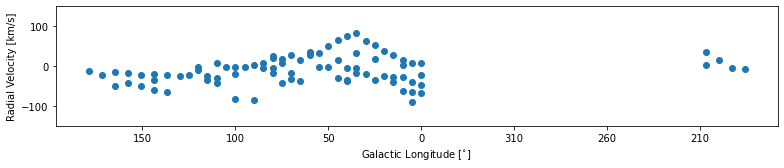

In [13]:
fig, ax = plt.subplots(figsize=(11, 2.5))

plt.scatter(l_all, v_all)

# Make the x-axis match the one in fig 2.6 for easier comparison
ticks = ax.get_xticks()
ticks[ticks < 0] += 360
ax.set_xticklabels([int(tick) for tick in ticks])
ax.invert_xaxis()

plt.ylim([-150, 150])
plt.xlabel("Galactic Longitude [$^{\circ}$]")
plt.ylabel("Radial Velocity [km/s]")
plt.tight_layout()

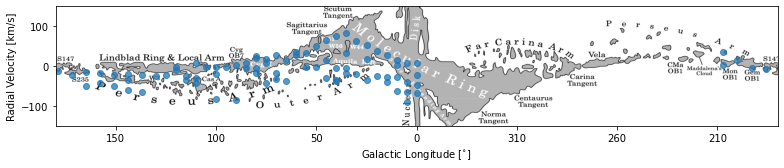

In [14]:
fig, ax = plt.subplots(figsize=(11, 2.5))

plt.scatter(l_all, v_all, alpha=0.75)

#Make the x-axis match the one in fig 2.6 for easier comparison
ticks = ax.get_xticks()
ticks[ticks < 0] += 360
ax.set_xticklabels([int(tick) for tick in ticks])
ax.invert_xaxis()

img_path = '/Users/william/Desktop/Labwork/Radio_astronomy/pics/lv_map.png' 
img = mpimg.imread(img_path)
ax.imshow(img, extent=[180, -180, 150, -150], aspect='auto', origin='lower')

plt.ylim([-150, 150])
plt.xlabel("Galactic Longitude [$^{\circ}$]")
plt.ylabel("Radial Velocity [km/s]")
plt.tight_layout()
#plt.savefig("lv_data.pdf")

# Head on map

In [15]:
lines_q1 =[]
lines_q23 =[]

l_q1 = np.deg2rad(np.array([0,0,0,0,5,5,5,5,10,10,10,10,15,15,15,20,20,25,25,25,30,30,35,35,35,35,40,40,40,40,45,45,45,50,50,55,55,60,60,65,65,70,70,70,75,75,75,80,80,80,80,85,85,90,90]))
l_q23 = np.deg2rad(np.array([95,100,100,100,105,110,110,110,115,115,120,120,125,130,137,137,144,144,144,151,151,158,158,165,165,172,179,186,193,200,207,207]))

for i in range(len(all_lines['l'])):
    if all_lines['l'][i] < 95:
        lines_q1.append(all_lines['V1'][i])
        lines_q1.append(all_lines['V2'][i])
        lines_q1.append(all_lines['V3'][i])
        lines_q1.append(all_lines['V4'][i])
    else:
        lines_q23.append(all_lines['V1'][i])
        lines_q23.append(all_lines['V2'][i])
        lines_q23.append(all_lines['V3'][i])
        lines_q23.append(all_lines['V4'][i])
        

lines_q1 = np.array(lines_q1)
lines_q23 = np.array(lines_q23)
nan_array = np.isnan(lines_q1)
nan_array_2 = np.isnan(lines_q23)
not_nan_array = ~ nan_array
not_nan_array_2 = ~ nan_array_2
lines_q1 = lines_q1[not_nan_array]
lines_q23 = lines_q23[not_nan_array_2]

#print(len(lines_q1))
#print(len(lines_q23))
#print(len(l_q1))
#print(len(l_q23))

R0 = 8 #kpc
V0 = 220 #km/s

def get_R(l,vel):
    return (R0*V0*np.sin(l))/(vel + V0*np.sin(l))

R_q1 = get_R(l_q1, lines_q1)
R_q23 = get_R(l_q23, lines_q23)

print(len(R_q1))
print(len(R_q23))

#quadrant 2 and 3 only have one solution (positive)
#quadrant 1 can have two (both positive), so btoh must be calculated


R1_s1= np.sqrt((R_q1**2) - (R0**2)*np.sin(l_q1)**2) + R0*np.cos(l_q1)
R1_s2= -np.sqrt((R_q1**2) - (R0**2)*np.sin(l_q1)**2) + R0*np.cos(l_q1)

#print(R1_s1)
#why 8 times nan ? no result possible?

55
32


<ipython-input-15-6c73de3f85e3>:50: RuntimeWarning: invalid value encountered in sqrt
  R1_s1= np.sqrt((R_q1**2) - (R0**2)*np.sin(l_q1)**2) + R0*np.cos(l_q1)
<ipython-input-15-6c73de3f85e3>:51: RuntimeWarning: invalid value encountered in sqrt
  R1_s2= -np.sqrt((R_q1**2) - (R0**2)*np.sin(l_q1)**2) + R0*np.cos(l_q1)


In [16]:
double =[]
l_sol =[]
r_sol =[]


for i in range(len(l_q1)):
    if R1_s1[i] >= 0 and R1_s2[i] >= 0:
        #print("double pos"+ str(np.rad2deg(l_q1[i])) + ": (" + str(R1_s1[i]) +  ", " + str(R1_s2[i]) + ")")
        double.append((l_q1[i],R1_s1[i],R1_s2[i]))
    elif R1_s1[i] >= 0:
        l_sol.append(l_q1[i])
        r_sol.append(R1_s1[i])
    elif R1_s2[i] >= 0:
        l_sol.append(l_q1[i])
        r_sol.append(R1_s2[i])

R23_s1= np.sqrt((R_q23**2) - (R0**2)*np.sin(l_q23)**2) + R0*np.cos(l_q23)

for i in range(len(l_q23)):
    if R23_s1[i] >0:
        l_sol.append(l_q23[i])
        r_sol.append(R23_s1[i])
        
print(len(l_q23))
print(len(l_sol))

#24 double, 12 NAN

32
51


In [17]:
l_sol =np.array(l_sol)
r_sol =np.array(r_sol)

#θ = 270° + l bzw. θ = l − 90°, which is needed for conversion to coordinate system x,y

θ_sol = l_sol - np.pi/2
x_sol = r_sol * np.cos(θ_sol)
y_sol = r_sol * np.sin(θ_sol)

#for the doubles

x_d_s1 =[]
y_d_s1 =[]
x_d_s2 =[]
y_d_s2 =[]

for l, r1, r2 in double:
    θ = l - np.pi/2
    x_d_s1.append(r1*np.cos(θ))
    y_d_s1.append(r1*np.sin(θ))
    x_d_s2.append(r2*np.cos(θ))
    y_d_s2.append(r2*np.sin(θ))

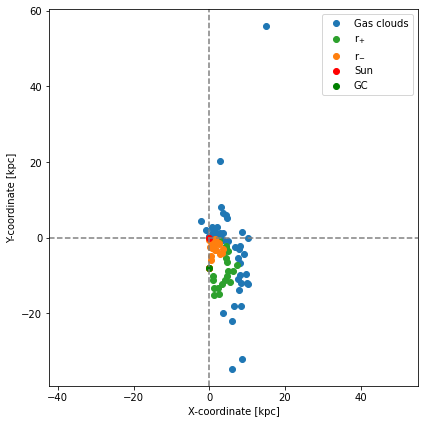

In [18]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


fig, ax = plt.subplots(figsize=(6,6))

plt.axvline(0, c=(.5, .5, .5), ls='--')
plt.axhline(0, c=(.5, .5, .5), ls='--')

plt.scatter(x_sol,y_sol, color=colors[0], label= 'Gas clouds')
plt.scatter(x_d_s1, y_d_s1 , color=colors[2],label= 'r$_{+}$')
plt.scatter(x_d_s2, y_d_s2 , color=colors[1], label= 'r$_{-}$')

plt.scatter(0, 0, color="r", label="Sun")
plt.scatter(0, -R0, color="green", label="GC")

#plt.title("Map of Milky Way")
plt.ylabel("Y-coordinate [kpc]")
plt.xlabel("X-coordinate [kpc]")
#print(new_first_quad_l_rad_arr)

ax.set_aspect('equal', adjustable='datalim')



plt.tight_layout()
plt.legend()
#plt.savefig("mw_map.pdf")

3.4946055237679516
-19.8188927736808


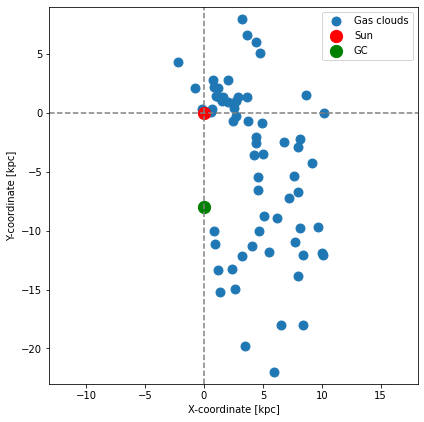

In [19]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


fig, ax = plt.subplots(figsize=(6,6))

plt.axvline(0, c=(.5, .5, .5), ls='--')
plt.axhline(0, c=(.5, .5, .5), ls='--')

plt.scatter(x_sol,y_sol, color=colors[0], label= 'Gas clouds', s=80)
plt.scatter(x_d_s1, y_d_s1 , color=colors[0], s= 80)
#plt.scatter(x_d_s2, y_d_s2 , label= 'r$_{-}$')

plt.scatter(0, 0, color="r", label="Sun", s=150)
plt.scatter(0, -R0, color="green", label="GC", s=150)

#plt.title("Map of Milky Way")
plt.ylabel("Y-coordinate [kpc]")
plt.xlabel("X-coordinate [kpc]")
#print(new_first_quad_l_rad_arr)

ax.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.xlim(-5,10)
plt.ylim(-23,9)
plt.legend()
#plt.savefig("mw_map.pdf")

print(x_sol[0])
print(y_sol[0])



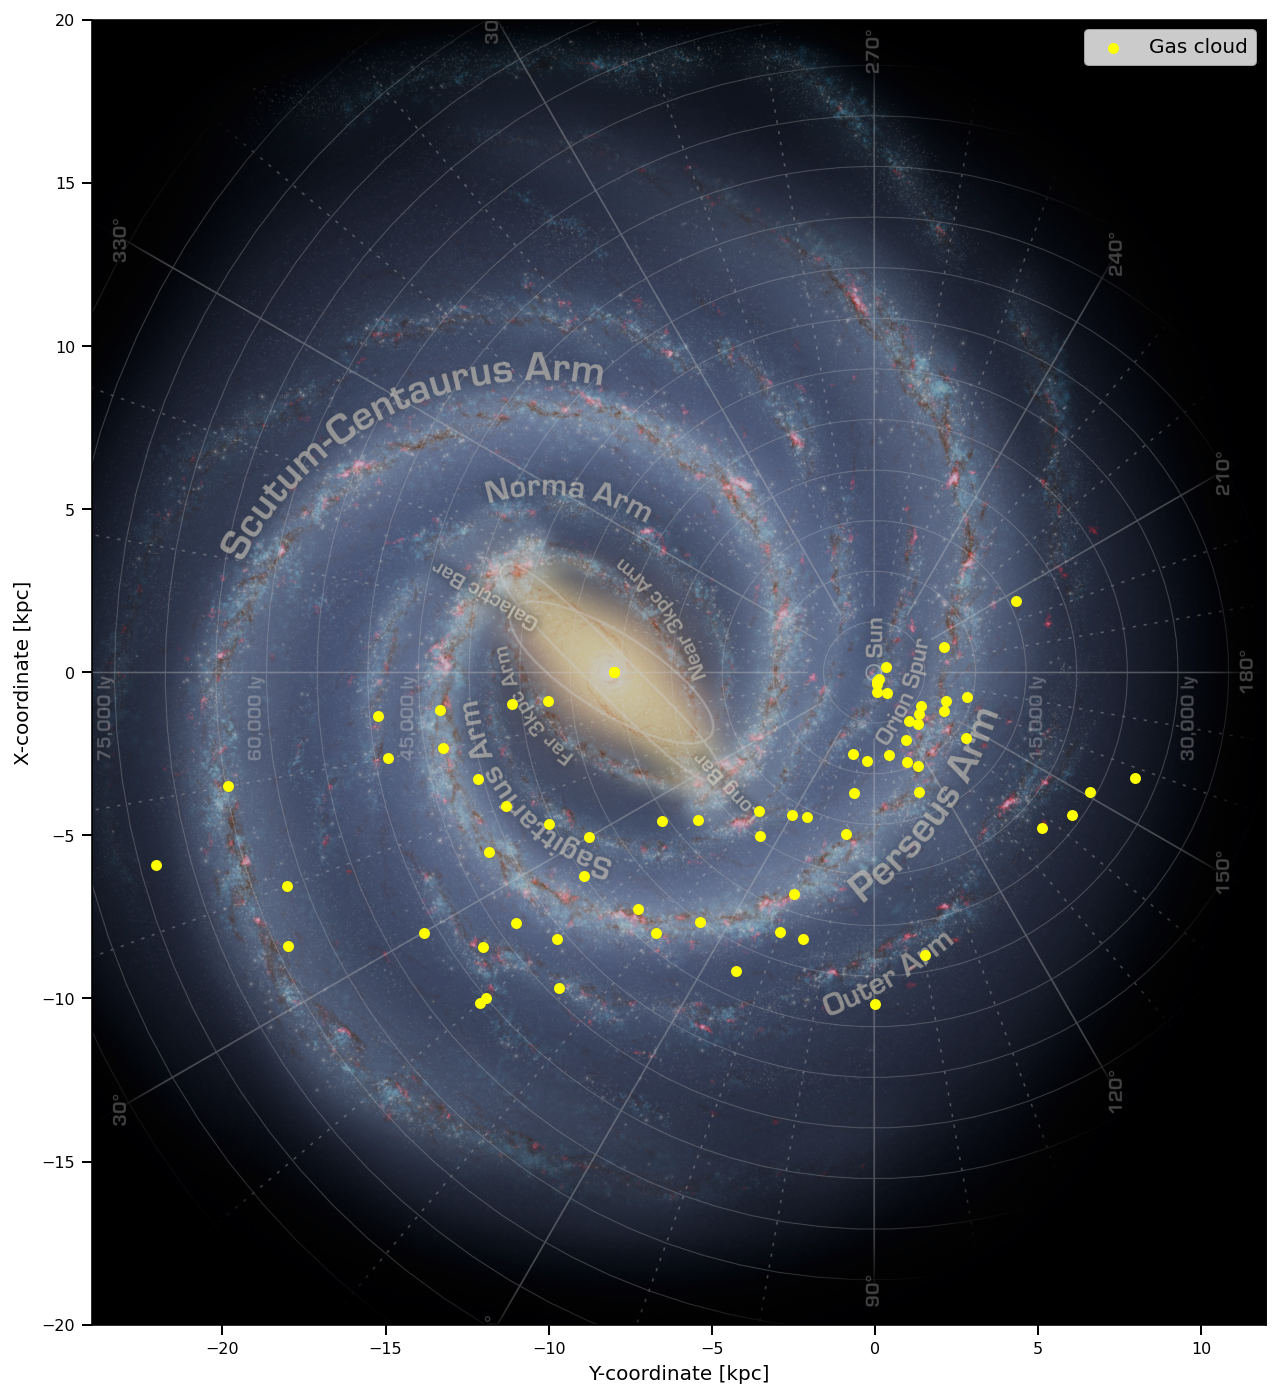

In [20]:
# setup a mw-plot instance of bird's eye view of the disc

# setup MWPlot instance, you have to specify center, radius, unit with astropy unit and choice of coord
# or not specifying any to use default value shown below
# center: Coordinates of the center of the plot, you cannot change this after creating the instance
# radius: Radius of the plot, you cannot change this after creating the instance
# coord: can be 'galactocentric' or 'galactic'
# annotation: whether use a milkyway background with annotation
# mode: can be 'face-on' or 'edge-on'
# rot180: whether to rotate the plot by 180degree, putting Earth location from left hand (-8, 0)kpc to right side (8, 0)kpc
# grayscale: whether to turn the background image to grayscale
plot_instance = MWPlot(mode='face-on',center=(0, 0)*u.kpc, radius=24 * u.kpc, unit=u.kpc, coord='galactic', annotation=True, grayscale=False, figsize=(15, 12))

#plot_instance = MWPlot(coord='galactic')
                       

# Here are some setting you can set after setting up a MWPlot instance
plot_instance.fontsize = 10  # fontsize for matplotlib plotting
#plot_instance.figsize = (5, 5)  # figsize for matplotlib plotting
#plot_instance.dpi = 200  # dpi for matplotlib plotting
#plot_instance.cmap = 'viridis'  # matplotlib cmap: https://matplotlib.org/examples/color/colormaps_reference.html
#plot_instance.clim = (vmin, vmax) # colorbar range
plot_instance.imalpha = 0.8  # alpha value for the milkyway image
plot_instance.s = 3.0  # make the scatter points bigger
plot_instance.tight_layout = True # whether plt.tight_layout() will be run

y_all = np.concatenate([y_d_s1, y_sol])
x_all = np.concatenate([x_d_s1, x_sol])

plot_instance.scatter(y_all*u.kpc, -x_all*u.kpc, c='yellow', s=20, zorder=3, label="Gas cloud")
#plot_instance.scatter(1*u.kpc, 0*u.kpc, c='r', s=20)
#plot_instance.scatter(0*u.kpc, 0*u.kpc, c='r', s=20)

plt.ylabel("X-coordinate [kpc]")
plt.xlabel("Y-coordinate [kpc]")

plt.xlim(-24,12)
plt.ylim(-20,20)


#plot_instance.scatter(y_dupes2*u.kpc, x_dupes2*u.kpc, color='cyan')
#plot_instance.scatter(y_dupes1*u.kpc, x_dupes1*u.kpc, color='cyan', alpha=1.0, zorder=3)
#plot_instance.scatter(ys*u.kpc, xs*u.kpc, color='cyan', label= 'Gas positions', alpha=1.0, zorder=3)
#plot_instance.scatter(-8*u.kpc, 0*u.kpc, c='yellow', label="GC", s=200)#,alpha=1.0, zorder=3)
#plot_instance.scatter(-8*u.kpc, 0*u.kpc, color="magenta", label="GC", alpha=1.0, zorder=3)

#print(new_first_quad_l_rad_arr)
plt.legend()
#plt.savefig("mw_headon.pdf")

# Show the figure
#plot_instance.show()

# Get requirements

In [21]:
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

numpy==1.18.5
astropy==4.0.1.post1
pandas==1.0.5
